# Lesson 8: Introduction to Machine Learning

Quick review: [Cute Numpy Refresher](https://github.com/rougier/numpy-100/blob/master/100_Numpy_exercises.ipynb)

Overview of Machine Learning X sklearn: [Josh Bloom's Notes](https://github.com/profjsb/python-seminar/blob/master/DataFiles_and_Notebooks/05_Scikits_Learn/00_intro_to_machine_learning.ipynb)

### My Personal Starting Point: Kernel Density Estimation

A basis of "nonparametric statistics"!

Approximating many distinct points as sum of continious "kernels", usually kernels.

$$\widehat{f}_h(x) = \frac{1}{n}\sum_{i=1}^n K_h (x - x_i) = \frac{1}{nh} \sum_{i=1}^n K\Big(\frac{x-x_i}{h}\Big)$$

Cute visualization I made once...
https://www.ocf.berkeley.edu/~bhorowit/anything_new.html



### SKLearn

The main package we will be using to do machine learning related tasks is sklearn.

In [11]:
%pylab inline
import sklearn

Populating the interactive namespace from numpy and matplotlib


sklearn comes with various sample datasets...

In [12]:
from sklearn import datasets 
boston = datasets.load_boston() # Boston house-prices
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [13]:
X = boston['data']   # 13 features (e.g. crime, # rooms, age, etc.)
Y = boston['target'] # response (median house price)

In [14]:
print("feature vector shape=", X.shape)
print("class shape=", Y.shape)

feature vector shape= (506, 13)
class shape= (506,)


In [15]:
print(boston.feature_names)
print(type(boston.feature_names))

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
<class 'numpy.ndarray'>


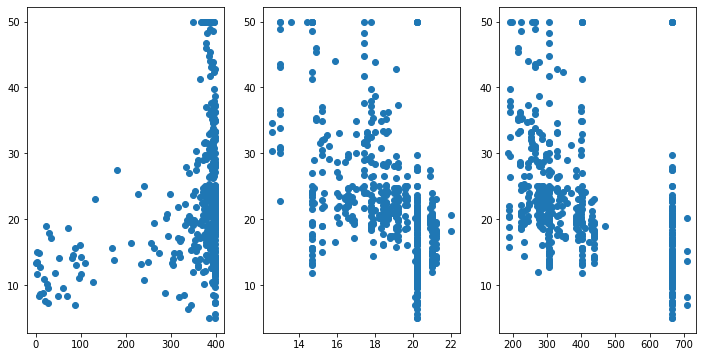

In [16]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,6))
ax1.scatter(X[:,11],Y)
ax2.scatter(X[:,10],Y)
ax3.scatter(X[:,9],Y)

Lets start by doing the simplest thing, a linear regression!

In [17]:
# half of data
import math
half = math.floor(len(Y)/2)
train_X = X[:half]
train_Y = Y[:half]
test_X = X[half:]
test_Y = Y[half:]

In [18]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

In [19]:
# fit the model
clf.fit(train_X, train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

For complex data we need to define a "measure of goodness"; generalizing from a $\chi^2$ type calculation we can use the mean square error...

$MSE = \frac{1}{N} \sum_i (n_{predict} - n_{true})^2$

In [20]:
# now do the prediction
Y_lr_pred = clf.predict(test_X)

# how well did we do?
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_Y,Y_lr_pred) 
print(mse)

303.43686292658987


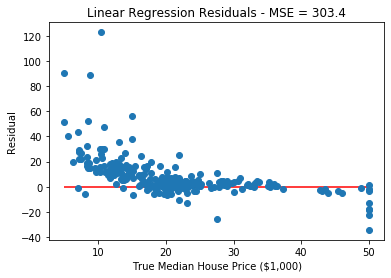

In [21]:
f, ax = plt.subplots()
ax.plot(test_Y,Y_lr_pred - test_Y,'o')
ax.set_title("Linear Regression Residuals - MSE = %.1f" % mse)
ax.set_xlabel("True Median House Price ($1,000)")
ax.set_ylabel("Residual")
ax.hlines(0,min(test_Y),max(test_Y),color="red")

Doesn't look great! :(

## *k*-Nearest Neighbor (KNN) Regression

"The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (radius-based neighbor learning). The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice. Neighbors-based methods are known as non-generalizing machine learning methods, since they simply “remember” all of its training data (possibly transformed into a fast indexing structure such as a Ball Tree or KD Tree.)."

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_regression_001.png">

http://scikit-learn.org/stable/modules/neighbors.html

In [24]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
X = np.array([[-3, -1], [-4, -5],[-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['half', 'clf', 'indices', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


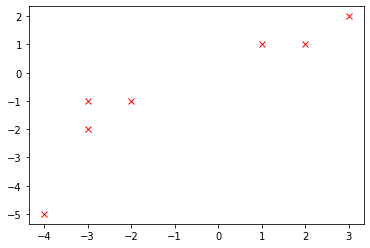

In [25]:
%pylab inline

plt.plot(X[:,0],X[:,1],"rx")

In [26]:
nbrs.kneighbors_graph(X).toarray()

array([[1., 0., 1., 1., 0., 0., 0.],
       [1., 1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 1., 0., 0., 0.],
       [1., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.]])

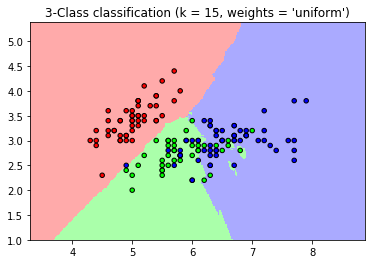

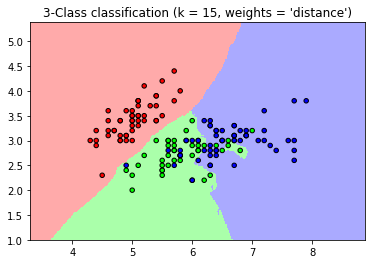

In [27]:
#example from website
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()


Lets apply it to boston city dataset!!

In [22]:
from sklearn import neighbors
from sklearn import preprocessing
# many methods work better on scaled X
X_scaled = preprocessing.scale(X) 
clf1 = neighbors.KNeighborsRegressor(5)
train_X = X_scaled[:half]
test_X = X_scaled[half:]
clf1.fit(train_X,train_Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

37.41498339920948


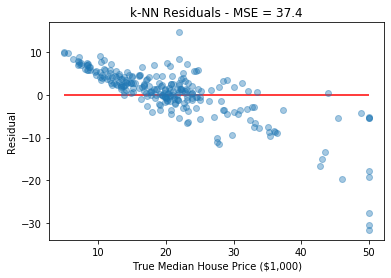

In [23]:
Y_knn_pred = clf1.predict(test_X)
mse = mean_squared_error(test_Y,Y_knn_pred) ; print(mse)

f, ax = plt.subplots()
ax.plot(test_Y, Y_knn_pred - test_Y,'o',alpha=0.4)
ax.set_title("k-NN Residuals - MSE = %.1f" % mse)
ax.set_xlabel("True Median House Price ($1,000)")
ax.set_ylabel("Residual")
ax.hlines(0,min(test_Y),max(test_Y),color="red")

Much better! :D